- [ ] Fix AUC value
- [ ] Add in ggplot2 ROC curve
- [ ] Finalize formating for notebook
- [ ] Implement splitting into training and test data
- [ ] Implement k-folds cross-validation
- [ ] Eliminate variables based upon correlation matrix
- [ ] Make sure factors are ordered 

# Introduction

<p align="justify">Welcome! In this case we'll be exploring how to use advanced analytic and machine learning techniques to predict strokes. Don't worry if you're unsure what some of these terms are. They'll be explained throughout the case. Let's begin! 
<br>
<br>
<details>
<summary>Some of the skills you'll explore are (Click to Expand):</summary>
<ul>
    <li>R Programming</li>
    <li>Data Cleaning</li>
    <li>Descriptive Analysis</li>
    <li>Data Visualization</li>
    <li>Leveraging Domain Knowledge</li>
    <li>Machine Learning</li>
</details><br>

<img src="https://i.stack.imgur.com/zlAi2.png" style="float: left; width: 35%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="http://cran.uvigo.es/Rlogo.svg" style="float: left; width: 25%; margin-left: 2%; margin-bottom: 0.5em;">
<img src="https://www.edvancer.in/wp-content/uploads/2015/10/f5bd5f87059fce20564f6e5eb562022e.png" style="float: left; width: 27%; margin-left: 5%; margin-bottom: 0.5em;">

## Case Scenario

Imagine you're an emergency physician at a local community hospital. Your hospital has recently joined a regional initiative to improve quality of care for stroke. After undergoing over a decade of training, you're well-versed in the clinical manifestations of stroke. Still, you know there is great uncertainty in diagnosing and treating stroke. The window for treatment is narrow and the drugs involved can have dangerous side-effects. Can analytics and machine learning help with this uncertainty?

Continue the case to find out

### Clinical Background: Stroke

Stroke is an acute neurologic condition referred to as a cerebrovascular event. This means stroke is a condition that affects the brain ("cerebro-") and involves blood vessels ("vascular). In stroke, arteries leading to and within the brain are either blocked by a clot or rupture. The end result is lack of oxygen and nutrients to the brain leading to brain damage. 

<p align="center">
  <img width="500" height=300" src="https://www.strokeinfo.org/wp-content/uploads/2019/06/HTN_16_pg39_art600x400.png">
</p>

Stroke is usually diagnosed clinically (by symptoms) and imaging (non-contrast head CT scan). Stroke can exhibit a wide range of symptoms depending on the location affected within the brain. Some nonspecific symptoms include headache ("worst headache of my life", nausea, vomiting, loss of consciousness, and neck stiffness. If suspected a non-contrast head CT is ordered to detect bleeding. Depending on whether the stroke is caused by a clot or rupture, treatment will be different. A clot will be treated with blood thinners. A rupture will be treated through emergent neurosurgery. 

> Stroke require prompt diagnosis and treatment before irreversible damages sets in. Any tool (such as a predictive model) that could make stroke diagnosis quicker or easier could make a large difference in preventing stroke. 

## Using Jupyter Notebook 

To run any of the code, select the code cell on the **bottom right (1.2)**, and click the `Run` button on the toolbar above. Try it out on the example code cell below on the **bottom right (1.2)**.

**The** `Run` **Button**
<img src="https://i.imgur.com/jr4dpLW.png" style="width:300px;height:150px;">

In [14]:
# This is an example of a code cell
cat('Congratulations! \n')
cat('You\'ve run your first code cell.\n')


Congratulations! 
You've run your first code cell.


### Jupyter Notebook Background

What is a Jupyter Notebook? Why is it so special? Below is a definition of Jupyter Notebook from the creators. 

> "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more." - [jupyter.org](https://www.jupyter.org)

Through integrating code, text, and multimedia, jupyter notebooks allow us to create a digital notebook that is both **interactive** and **informative**. Don't just take my word for it though, personally explore how Jupyter Notebook can augment your learning through the case!
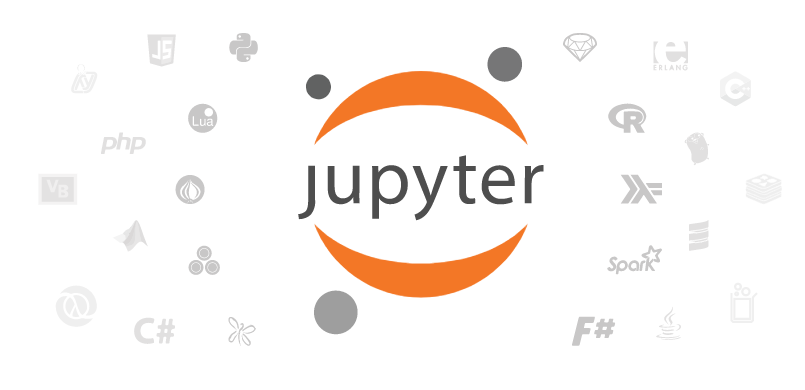


### Case Code Tips

Within code cells you will see green text preceded by a `#` symbol. These are comments and will help explain what portions of the code are doing. All code should be ready to run as shown. 

Some code may require more time to run. On the left hand side you will notice the label: `In [ ]:`. If there is an `*` in between the `[]`'s after you select `Run`, that indicates that your code is in the process of running. Like so: `In [*]:`

## Meeting Our Data

We'll be using a deidentified set of patient data made available on [kaggle](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/version/1), a data science community website. The data was originally provided by Mckinsey Analytics for a online hackathon hosted by Analytics Vidhya.  


### Data File

<p style="text-align: center;">stroke_predict.csv</p>

***
This file contains our dataset. There are a little over 43,000 patients with 12 variables. The data includes general demographic and clinical variables. 

The dataset will already be downloaded for the case. The The original data can be acceded [here](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/version/1). 

### Consulting the Data Dictionary

There are several variables or labels which you might not understand. There are many reasons for this. You might lack domain experience for the data you're analyzing. The data creators might also have used arbitrary labels only they understood (this is considered a bad practice).

The way to combat this is consulting the data dictionary or documentation. These are table or documents which describe the data in detail. Have a variable you don't understand? Check the documentation! Don't understand what an output for a variable means? Check the documentation!


A data dictionary is provided on the [kaggle page](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/version/1#Screen%20Shot%202018-04-17%20at%2012.15.42%20AM.png) where the data is hosted. The data dictionary has also been reproduced below for your convenience.  

<center>

| *Variable*        | *Definition*                                           |
| ----------------- | ------------------------------------------------------ |
| id                | Patient ID                                             |
| gender            | Gender of Patient                                      |
| age               | Age of Patient                                         | 
| hypertension      | 0 - no hypertension, 1 - suffering from hypertension   |
| heart_disease     | 0 - no heart disease, 1 - suffering from heart disease |
| ever_married      | Yes/No                                                 |
| work_type         | Type of occupation                                     |
| Residence_type    | Area type of residence (Urban/ Rural                   |
| avg_glucose_level | Average Glucose level (measured after meal)            |
| bmi               | Body mass index                                        |
| smoking_status    | patient's smoking status                               |
| stroke            | patient's smoking status                               |

</center>

# Setup (Do Not Skip)

Run the code below to set up specific settings for our case. Do not skip this step!

In [15]:
# Increase max number of columns displayed in output tables
options(repr.matrix.max.cols = 2000)
set.seed(10) # Make sure your ML results are the same
# Calling external libraries for additional functionality
suppressMessages(library(tidyverse))
suppressMessages(library(randomForest))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(caret))
library(e1071)
suppressMessages(library(Metrics))
suppressMessages(library(AUC))

cat('Setup complete!')

Setup complete!

# Cleaning Our Data

The first step in any analytic project is to clean our data. This is a critical step that commonly overlooked within data science projects. However, without properly processed data, it won't matter how sophisticated our analysis is. A common saying in data science is "Junk in, Junk out". 

## Reading Our data

We'll being by reading in our data so we can clean and use it. 

In [16]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
cat('Data loading, please wait\n')
stroke_data <- read.csv(file="data/stroke_predict.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Data loading, please wait
Data loaded!

Now let's get an overview of our data

In [17]:
head(stroke_data)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
30669,Male,3,0,0,No,children,Rural,95.12,18.0,,0
30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
16523,Female,8,0,0,No,Private,Urban,110.89,17.6,,0
56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,,0
32257,Female,47,0,0,Yes,Private,Urban,210.95,50.1,,0


We can see many variables have not been coded (hypertension, heart disease, stroke). We will also need to convert some of the clinical variables into meaningful categories (avg_glucose_level and bmi). 

## Recoding Variables

In [18]:
# Recoding
stroke_data$hypertension[stroke_data$hypertension == 1] <- 'History of hypertension'
stroke_data$hypertension[stroke_data$hypertension == 0] <- 'No hypertension'
stroke_data$heart_disease[stroke_data$heart_disease == 1] <- 'History of heart disease'
stroke_data$heart_disease[stroke_data$heart_disease == 0] <- 'No heart disease'
stroke_data$stroke[stroke_data$stroke == 1] <- 'History of stroke'
stroke_data$stroke[stroke_data$stroke == 0] <- 'No stroke'
cat('Data Recoded')

Data Recoded

Lets confirm our changes

In [19]:
head(stroke_data[c('hypertension', 'heart_disease', 'stroke')])

hypertension,heart_disease,stroke
No hypertension,No heart disease,No stroke
History of hypertension,No heart disease,No stroke
No hypertension,No heart disease,No stroke
No hypertension,No heart disease,No stroke
No hypertension,No heart disease,No stroke
No hypertension,No heart disease,No stroke


In addition, these variables are categorical. However, R automatically codes and numbers it detects as integers. Since the dataset originally began with these variables as '0' or '1', we need to convert these variables from integer to categorical. 

## Creating Clinically Relevant Variables

Our data includes two clinical measures: 'avg_glucose_lvl' and 'bmi'. We will be taking these measure and creating clinically meaningful variables. 

### Converting numeric to categorical data

**Pre-Check:** What is the difference between a quantitative and categorical variable?

- **Quantitative:** variables whose values are whole numbers (ie. numbers, percents)
- **Categorical:** variables whose values are selected from a group (ie. dog breeds, male/female) 

In [20]:
stroke_data$hypertension <- as.factor(stroke_data$hypertension)
stroke_data$heart_disease <- as.factor(stroke_data$heart_disease)
stroke_data$stroke <- as.factor(stroke_data$stroke)

cat('Conversion complete!')

Conversion complete!

### BMI

BMI stands for Body Mass Index. This a measure of body weight based upon a person's weight and height. This measure is commonly used to classify individuals as being overweight or a health weight. Below is the BMI formula. 

\[\large \frac{weight (kg)}{[height (m)]^{2}}\]

We will create a new variable which reflects the clinical cutoffs for bmi. 

**Knowledge Check:** What are the clinical cut-offs for BMI?

<center>

| *Category*     | *BMI Range*     |
| -------------- | --------------- |
| Underweight    | BMI < 18.5      |
| Healthy Weight | 18.5 ≤ BMI < 25 |
| Overweight     | 25 ≤ BMI < 30   |
| Obese          | 30 ≥ BMI        |

</center>

Let create the new variable 'bmi_interp' based off these cut-offs 

In [21]:
# Create 'bmi_interp'
stroke_data <- mutate(stroke_data, bmi_interp = ifelse(bmi < 18.5, 'Underweight', 
                                        ifelse(bmi >= 18.5 & bmi < 25, 'Healthy Weight',
                                              ifelse(bmi >= 25 & bmi < 30, 'Overweight',
                                                    ifelse(bmi >= 30, 'Obese', NA)))))

# Convert from character to categorical
stroke_data$bmi_interp <- as.factor(stroke_data$bmi_interp)

cat('\'bmi_interp\' variable created!')

'bmi_interp' variable created!

Let's confirm our results

In [22]:
head(stroke_data[c('bmi', 'bmi_interp')])

bmi,bmi_interp
18.0,Underweight
39.2,Obese
17.6,Underweight
35.9,Obese
19.1,Healthy Weight
50.1,Obese


#### Limitations and Considerations when using BMI

BMI is a simple, inexpensive, and common measure for body fat. However, there are several clinical considerations to keep in mind when using this measure. It's critical to keep in mind BMI is only a surrogate measure since it uses weight instead of actual body fat content in its calculations. Below are three examples of factors that can influence BMI:

- age: older adults usually have more body fat than younger adults for the same BMI
- gender: women tend to have greater amounts of body fat compared to men for the same BMI
- muscle mass: muscular individuals or athletes may have higher BMI due to increased muscle mass

[Source](https://www.cdc.gov/obesity/downloads/bmiforpactitioners.pdf)

### Average Glucose Level

The data dictionary defines 'avg_glucose_lvl' as the average glucose level measured after meals (glucose is another term for blood sugar levels). Glucose levels are commonly used to assess whether a patient has diabetes. A patient with diabetes will have a on-average a higher blood glucose level.

However, unlike BMI, 'avg_glucose_lvl', as defined by the data dictionary is clinically problematic. 

**Food for Thought:** What's wrong with 'avg_glucose_lvl' as a measure of blood glucose levels? What is a better measure of average blood sugar status?

Individual's blood glucose can vary widely day to day. This is especially true after meals when individuals are experiencing a physiological spike in their glucose levels. 

[Here's a news article discussing inter-population variability in glucose measurements](https://www.medicalnewstoday.com/articles/322614.php)

A better measure would be hemoglobin A1C which measures the amount of sugar attached to each red blood cell. This is an indication of the average blood glucose status of a patient over 2 to 3 months. 

<img src="https://www.ekfdiagnostics.com/res/HbA1c-Hemoglobin-banner" style="text-align: center; width: 66%;">

We can't change the measurements used in the data. This will be a limitation we keep in mind for our model. However, just because the glucose measurement is not ideal doesn't mean we need to disregard it completely. 

A good proxy for 'avg_glucose_level' would be the oral glucose tolerance test (OGTT)

**Knowledge Check:** What are the criteria for normal, prediabetic, and diabetic in the OGTT two hours after drinking??

<center>

| *Category*     | *Blood Glucose (mg/dl)*   |
| -------------- | ------------------------- |
| Diabetic       | 200 ≤ Blood Glucose       |
| Prediabetic    | 140 ≤ Blood Glucose < 200 |
| Healthy        |  Blood Glucose < 140      |

</center>

We will now use these criteria to classify a patient's 'avg_glucose_level' as either normal, prediabetic, or diabetic based upon OGTT criteria. 

In [23]:
# Create 'diabetic_interp'
stroke_data <- mutate(stroke_data, 
                      diabetic_interp = ifelse(avg_glucose_level < 140, 'Healthy', 
                          ifelse(avg_glucose_level >= 140 & avg_glucose_level < 200, 'Prediabetic',
                              ifelse(avg_glucose_level >= 200, 'Diabetic', NA))))

# Convert from character to categorical
stroke_data$diabetic_interp <- as.factor(stroke_data$diabetic_interp)

cat('\'diabetic_interp\' variable created!')

'diabetic_interp' variable created!

Let's confirm our changes

In [24]:
head(stroke_data[c('avg_glucose_level', 'diabetic_interp')])

avg_glucose_level,diabetic_interp
95.12,Healthy
87.96,Healthy
110.89,Healthy
69.04,Healthy
161.28,Prediabetic
210.95,Diabetic


### Smoking Status (Creating missing variables)

When looking at our data, we can also see 'smoking_status' has quite a few blanks.

In [25]:
head(stroke_data)
table(stroke_data$smoking_status)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_interp,diabetic_interp
30669,Male,3,No hypertension,No heart disease,No,children,Rural,95.12,18.0,,No stroke,Underweight,Healthy
30468,Male,58,History of hypertension,No heart disease,Yes,Private,Urban,87.96,39.2,never smoked,No stroke,Obese,Healthy
16523,Female,8,No hypertension,No heart disease,No,Private,Urban,110.89,17.6,,No stroke,Underweight,Healthy
56543,Female,70,No hypertension,No heart disease,Yes,Private,Rural,69.04,35.9,formerly smoked,No stroke,Obese,Healthy
46136,Male,14,No hypertension,No heart disease,No,Never_worked,Rural,161.28,19.1,,No stroke,Healthy Weight,Prediabetic
32257,Female,47,No hypertension,No heart disease,Yes,Private,Urban,210.95,50.1,,No stroke,Obese,Diabetic



                formerly smoked    never smoked          smokes 
          13292            7493           16053            6562 

We need to make sure R can recognize these values as missing values

In [26]:
stroke_data[stroke_data == ''] <- NA
table(stroke_data$smoking_status, exclude = NULL)


                formerly smoked    never smoked          smokes            <NA> 
              0            7493           16053            6562           13292 

In [27]:
# Determine number of missing for each variable
stroke_data %>% summarise_all(funs(sum(is.na(.))))

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_interp,diabetic_interp
0,0,0,0,0,0,0,0,0,1462,13292,0,1462,0


# Exploratory Data Analysis 

Now that we've cleaned our data we can begin exploring our data. Using this, we can infer some basic relationships and see the structure of our data. This can also inform which features (variables) we select when building our prediction model. 

### Why Can't We Just Use All or Most Variables?

One issue you might be wondering about is why do we even need to select variables. Why not just use all of the variables? After all, more data lead to better models right? This is a common misconception that even experienced analysts need to watch out for. Including too many features in your prediction model can lead to what is known as 'overfitting'. Overfitting is essentially where you build a model that adheres too closely to your current data set and is unable to predict observations that are not from your current data set. In other words, its where you develop a model that tuned too closely to your current data, and is not generalizable to outside data sources. 

<img src="https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">

### Getting A Closer Look At Our Data

In [14]:
str(stroke_data)

'data.frame':	43400 obs. of  14 variables:
 $ id               : int  30669 30468 16523 56543 46136 32257 52800 41413 15266 28674 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 2 1 1 2 1 1 1 1 1 ...
 $ age              : num  3 58 8 70 14 47 52 75 32 74 ...
 $ hypertension     : Factor w/ 2 levels "History of hypertension",..: 2 1 2 2 2 2 2 2 2 1 ...
 $ heart_disease    : Factor w/ 2 levels "History of heart disease",..: 2 2 2 2 2 2 2 1 2 2 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 2 2 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 1 4 4 4 3 4 4 5 4 5 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 1 2 2 1 1 2 2 1 1 2 ...
 $ avg_glucose_level: num  95.1 88 110.9 69 161.3 ...
 $ bmi              : num  18 39.2 17.6 35.9 19.1 50.1 17.7 27 32.3 54.6 ...
 $ smoking_status   : Factor w/ 4 levels "","formerly smoked",..: NA 3 NA 2 NA NA 2 3 4 3 ...
 $ stroke           : Factor w/ 2 levels "History of str

In [15]:
summary(stroke_data[,-1])

    gender           age                         hypertension  
 Female:25665   Min.   : 0.08   History of hypertension: 4061  
 Male  :17724   1st Qu.:24.00   No hypertension        :39339  
 Other :   11   Median :44.00                                  
                Mean   :42.22                                  
                3rd Qu.:60.00                                  
                Max.   :82.00                                  
                                                               
                  heart_disease   ever_married         work_type    
 History of heart disease: 2062   No :15462    children     : 6156  
 No heart disease        :41338   Yes:27938    Govt_job     : 5440  
                                               Never_worked :  177  
                                               Private      :24834  
                                               Self-employed: 6793  
                                                                    
     

This hand summary page presents us with quite a bit of data. The first thing to realize is that the output will differ based on whether the variable is numeric or categorical. Numeric outputs will include summary statistics while categorical variables will include frequency counts of each category. 

The first indicator of whether a variable would be a good candidate for being a building block of our prediction model is the number of missing values. Among the categorical variables, the only variable with a significant amount of missing data is `smoking_status`.

There are varying interpretations of what constitutes a significant amount of missing data. For our purpose we will consider any variable with >10% of it's values missing as having a significant number of missing observations. 

Why is using variables with significant amounts of missing data problematic for making predictions?

The next step will then be to determine whether the data missing is simply the result of random chance or not. If the result is simply due to random chance, this problematic since it will be less likely to bias our results. However, if there missing values don't appear be due to random chance, this is more problematic. 

If there something different about the missing group (ie. there is a hidden reason the data is missing), this may bias your outcome. This would lead to incorrect predictions!

Lets split our `smoking_status` variable into missing or not missing

In [16]:
# Split Into Null or Not
stroke_data <- mutate(stroke_data, smoke_miss = ifelse(smoking_status == 'NA', 'Missing', 'Not Missing'))
stroke_data$smoke_miss <- invisible(fct_explicit_na(stroke_data$smoke_miss, na_level = 'Missing'))

# Confirm results
table(stroke_data$smoke_miss)


Not Missing     Missing 
      30108       13292 

Now we can test whether the incidence of stroke differs significantly between individuals who responsed about smoking status and those who did not.

In [17]:
table(stroke_data$smoke_miss, stroke_data$stroke)
chisq.test(stroke_data$stroke, stroke_data$smoke_miss)

             
              History of stroke No stroke
  Not Missing               638     29470
  Missing                   145     13147


	Pearson's Chi-squared test with Yates' continuity correction

data:  stroke_data$stroke and stroke_data$smoke_miss
X-squared = 54.443, df = 1, p-value = 1.6e-13


We can see that the missing whether or not data is available about smoking status significantly affects the results. This is unfortunate. Clinically, it has been well-documented that smoking can lead to increased incidence of cardiovascular disease and can increase the likelihood of stroke. However, our analysis indicates that including this data, which has so many missing data, would bias our model. Despite our clinical intuition suggesting smoking status would be a good candidate, the data is not robust enough to support a prediction model. 

What is a chi-squared test? Is a chi-square used for numeric or categorical variables?

Insert explanation

Lets take a look at our other variables

In [18]:
summary(stroke_data[,-1])

    gender           age                         hypertension  
 Female:25665   Min.   : 0.08   History of hypertension: 4061  
 Male  :17724   1st Qu.:24.00   No hypertension        :39339  
 Other :   11   Median :44.00                                  
                Mean   :42.22                                  
                3rd Qu.:60.00                                  
                Max.   :82.00                                  
                                                               
                  heart_disease   ever_married         work_type    
 History of heart disease: 2062   No :15462    children     : 6156  
 No heart disease        :41338   Yes:27938    Govt_job     : 5440  
                                               Never_worked :  177  
                                               Private      :24834  
                                               Self-employed: 6793  
                                                                    
     

We can see that there are a couple numeric variables. However, the only one we would consider is age since the `bmi` and `avg_glucose_level` have newer and more clinically relevant variables available. 

We have some summary stats about age available. Lets take a look at the distribution. 

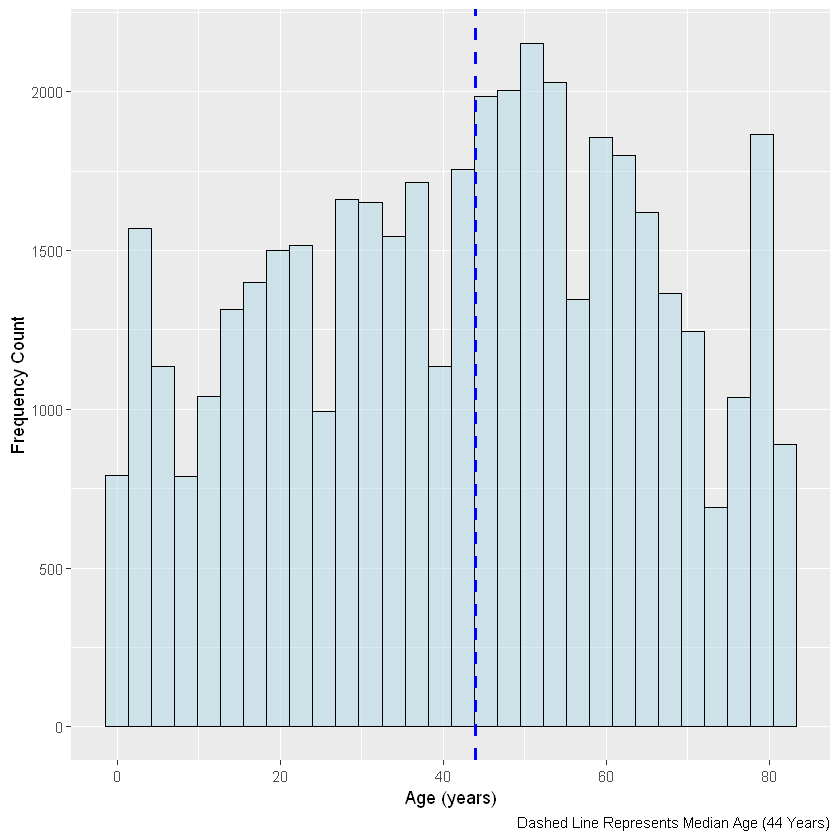

In [19]:
# Create Plot
age_plot <- ggplot(stroke_data, aes(x=age)) +
geom_histogram(alpha = 0.5, position = 'identity', bins=30, color ='black ', fill='light blue') +
labs(x='Age (years)', y='Frequency Count', caption = 'Dashed Line Represents Median Age (44 Years)')

# Display + Median Line
age_plot + geom_vline(aes(xintercept=median(age)),
            color="blue", linetype="dashed", size=1)

Now lets see if theres a relationship between stroke status and age

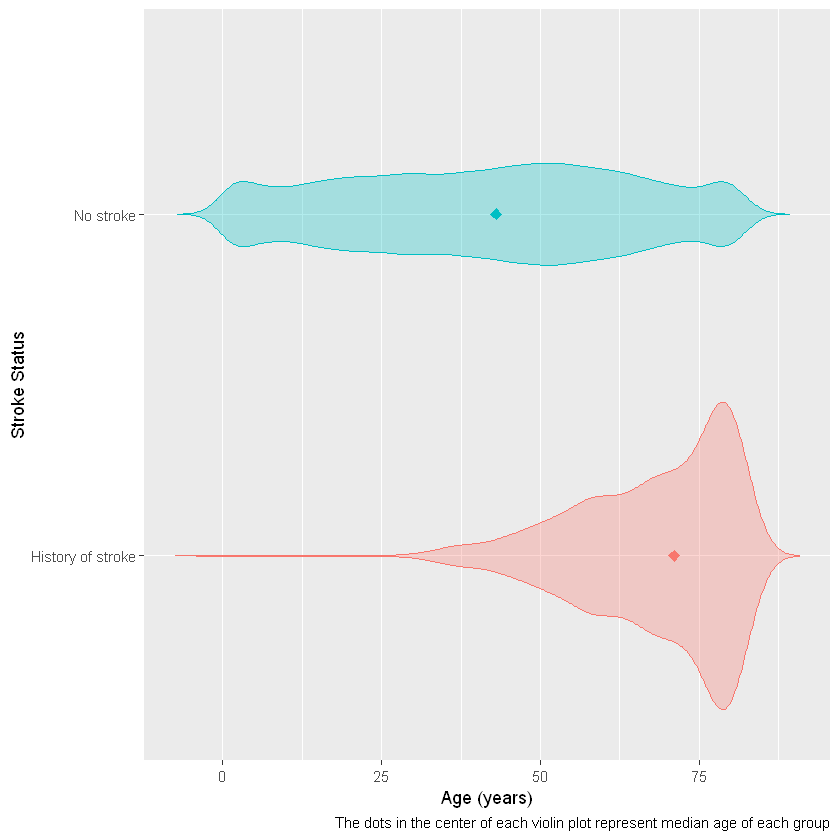

In [20]:
# Create Plot
violin_plot_age <- ggplot(stroke_data, aes(x=stroke, y=age, color = stroke, fill = stroke)) + 
geom_violin(alpha = 0.3, trim = FALSE) + # By default tails are trimmed
stat_summary(fun.y=median, geom="point", shape = 23, size = 2) +
theme(legend.position='none') +
labs(y='Age (years)', x='Stroke Status', 
     caption = 'The dots in the center of each violin plot represent median age of each group') +
coord_flip()

# Display Plot
violin_plot_age

The results are pretty stark. Both median age and distribution of age drastically differs between the stroke and non-stroke group. This make sense since as individuals age, they are predisposed to cardiovascular events such as atherosclerosis or stroke. 

These results indicate age is an excellent candidate variable for our model. 

### Insert New Heading

Finally lets look at our remaining variables. The rest of the variable of interest are categorical. We should be able to observe their effect on stroke well and quickly using stacked bar plots. 

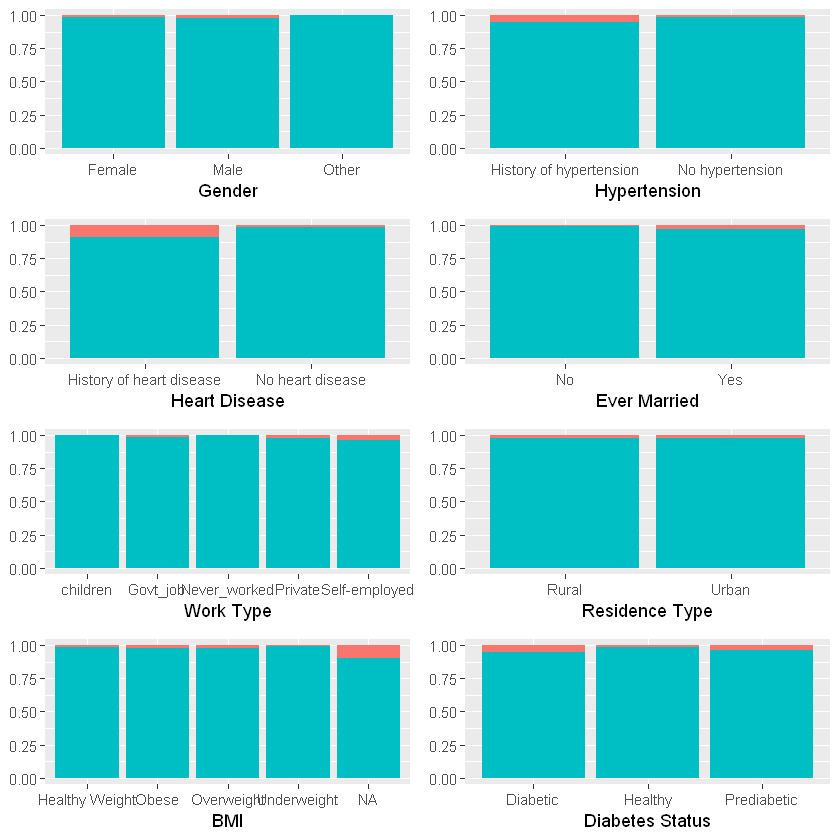

In [21]:
p1 <- ggplot(stroke_data, aes(x=gender, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Gender', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p2 <- ggplot(stroke_data, aes(x=hypertension, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Hypertension', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p3 <- ggplot(stroke_data, aes(x=heart_disease, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Heart Disease', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p4 <- ggplot(stroke_data, aes(x=ever_married, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Ever Married', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p5 <- ggplot(stroke_data, aes(x=work_type, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Work Type', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p6 <- ggplot(stroke_data, aes(x=Residence_type, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Residence Type', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p7 <- ggplot(stroke_data, aes(x=bmi_interp, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='BMI', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p8 <- ggplot(stroke_data, aes(x=diabetic_interp, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Diabetes Status', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

# Arrange plots into grid
plot_grid(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)


This plot grid allows us to quickly see how stroke rates differ depending on variable. Based on observation it appears hypertension, heart disease, marriage status, work type, BMI, and diabetes status all seem to have an effect on stroke and seem to be promising candidate variables. 

We now have the variables we need to build our predictive model!

# Building A Predictive Model

Now that our variables have been successfully converted and our outcome has been defined, we can analyze our data. Logistic regression is a mathematical model that estimates the probability of a binary outcomes (such as our risk label). It is named after the logistic curve which takes the S-shape depicted below.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png?1566122052688" alt="Logistic Curve" title="Logistic Curve" />

**Pre-Check:** What is our primary outcome? What information will a logistic regression model tell use about our outcome?

**Follow-Up:** What is statistical significance? What is a generally accepted level of statistical significance in healthcare research?

It will allow us to analyze which variables have a statistically significant effect on whether an asthmatic individual is high- or low-risk. Logistic regression is a commonly used technique in health analytics because it is easy to interpret and is thought to model the multi-factorial causes of disease well. 

Statistical Significance can be defined as the chance that the relationship you observed in your data occurred by chance. What does this mean? Lets say our logistic regression model finds that weight has a statistically significant effect on being high risk or low risk asthmatic patient. This means that it more likely that there is indeed a relationship between weight and risk than chance would suggest. 

The conventional level of significance that is accepted is < 0.05 (this number is referred to as a p-value). This means that there is less than 5% chance that the observed relationship in the data was due to chance alone. The image below display a sample R output.

<img src="https://drchrispook.files.wordpress.com/2017/02/anova-output-from-r1.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

Lets create out logistic model

In [22]:
# Creating a logistic regression model
mylogit <- glm(stroke ~ gender + age + hypertension + heart_disease + 
               ever_married + work_type + bmi_interp + diabetic_interp,
               data = stroke_data, family = "binomial")
mylogit.sum <- summary(mylogit)
mylogit.sum


Call:
glm(formula = stroke ~ gender + age + hypertension + heart_disease + 
    ever_married + work_type + bmi_interp + diabetic_interp, 
    family = "binomial", data = stroke_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0884   0.0471   0.0938   0.1777   0.8040  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     7.736330   1.029877   7.512 5.83e-14 ***
genderMale                     -0.081512   0.083364  -0.978    0.328    
genderOther                    10.564516 850.526739   0.012    0.990    
age                            -0.071337   0.003427 -20.815  < 2e-16 ***
hypertensionNo hypertension     0.412685   0.094779   4.354 1.34e-05 ***
heart_diseaseNo heart disease   0.666284   0.103971   6.408 1.47e-10 ***
ever_marriedYes                 0.116888   0.135409   0.863    0.388    
work_typeGovt_job              -0.873123   1.042413  -0.838    0.402    
work_typeNever_worked         

## Building a Prediction Model

**Pre-Check:** So far we haven't done any machine learning yet. What we've done can be considered traditional statistical analyses. What differentiate machine learning for statistical analysis?

In machine learning, data is split into a training and test set. A machine learning model is then trainined on the training set to predict whatever outcome of interest it was designed to predict (in our case we're predicting whether the asthmatic patient is high- or low- risk). The models predictive performance is then evaluated using the test set. 

<img src="https://www.sqlservercentral.com/wp-content/uploads/2019/05/Image-2.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

In [23]:
# Set up the model
frml <- (stroke ~ gender + age + hypertension + heart_disease + ever_married + work_type +  bmi_interp
         + diabetic_interp)

# Add in NA action to exclude missing 
model_rf <- randomForest(formula = frml, data = stroke_data, na.action=na.omit)

# Predict
prediction_rf <- predict(object = model_rf,
                         newdata = select(stroke_data, -stroke),
                         type = "class")

# Output results
confusionMatrix(data = prediction_rf, reference = stroke_data$stroke)

Confusion Matrix and Statistics

                   Reference
Prediction          History of stroke No stroke
  History of stroke                 0         0
  No stroke                       643     41295
                                           
               Accuracy : 0.9847           
                 95% CI : (0.9834, 0.9858) 
    No Information Rate : 0.9847           
    P-Value [Acc > NIR] : 0.5105           
                                           
                  Kappa : 0                
                                           
 Mcnemar's Test P-Value : <2e-16           
                                           
            Sensitivity : 0.00000          
            Specificity : 1.00000          
         Pos Pred Value :     NaN          
         Neg Pred Value : 0.98467          
             Prevalence : 0.01533          
         Detection Rate : 0.00000          
   Detection Prevalence : 0.00000          
      Balanced Accuracy : 0.50000          
  

We see that our accuracy is over 90%. However, we did not correctly identify a single stroke. Would a model like this be useful? Absolutely not! All it could do is predict no strokes, the opposite of what we want!

This is one of the weaknesses of random forests. Since the data is very imbalanced (ie. there are tons of negative results and only a few positive results), we can still maintain over 90% accuracy not predict a single stroke. The algorithm is biased towards outcomes which maximizes its accuracy. 

So what can we do? There are several approaches. We will be implementing a solution known as a weighted random forest. This will punish the algorithm more heavily for misclassifying the data. This is known as cost-sensitive learning. 

In [24]:
# New weight rf model
model_rf3 <- randomForest(formula = frml, data = stroke_data, na.action=na.omit, classwt=c(0.5, 0.5))

prediction_rf3 <- predict(object = model_rf3,
                         newdata = select(stroke_data, -stroke),
                         type = "class")

confusionMatrix(data = prediction_rf3, reference = stroke_data$stroke)

Confusion Matrix and Statistics

                   Reference
Prediction          History of stroke No stroke
  History of stroke               561      8825
  No stroke                        82     32470
                                           
               Accuracy : 0.7876           
                 95% CI : (0.7837, 0.7915) 
    No Information Rate : 0.9847           
    P-Value [Acc > NIR] : 1                
                                           
                  Kappa : 0.0856           
                                           
 Mcnemar's Test P-Value : <2e-16           
                                           
            Sensitivity : 0.87247          
            Specificity : 0.78629          
         Pos Pred Value : 0.05977          
         Neg Pred Value : 0.99748          
             Prevalence : 0.01533          
         Detection Rate : 0.01338          
   Detection Prevalence : 0.22381          
      Balanced Accuracy : 0.82938          
  

Much better! Lets evaluate our models performance now

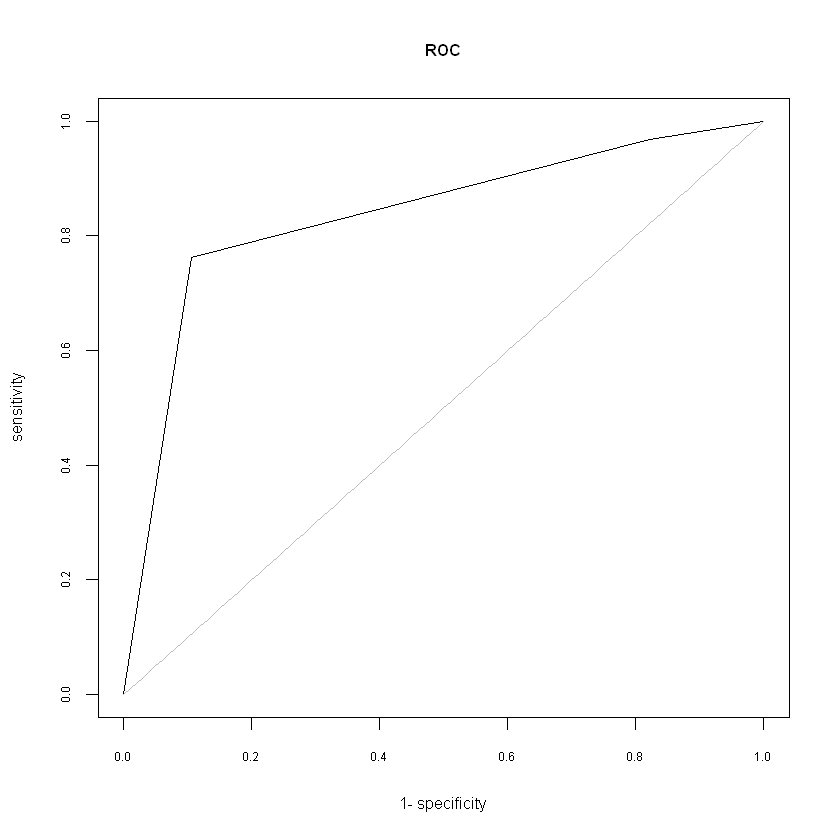

In [25]:
plot(roc(prediction_rf3, stroke_data$stroke), main = "ROC", cex.axis=0.6, cex.main=0.8, cex.lab=0.8)

In [26]:
print(paste0("AUC = ", round(Metrics::auc(actual = stroke_data$stroke, predicted = prediction_rf3), 4)))

[1] "AUC = NaN"


### What Is A Confusion Matrix

A confusion matrix is a 2x2 table which computes 4 different combinations of predicted vs. actual values. The combinations are True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)

<img src="https://miro.medium.com/max/320/1*Z54JgbS4DUwWSknhDCvNTQ.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

These 4 interpretations can be combined to generate many useful metrics. For our purpose there are three we will focus on. The first is accuracy: 

\[\large (TP + TN)/Total\]

Accuracy allows us to measure how often our model predicted correctly. The second metric is sensitivity:

\[\large TP / (TP + FN)\]

Sensitivity asks the question, that when our outcome is actually positive (ie. in our case when our patient is actually high-risk) how often will the model predict positively (ie. how often will the model then predict the patient to be high-risk). The final metric is specificity:

\[\large FP / (FP + TN)\]

Specificity asks the question, that when the outcome is actually negative (ie. in our case when our patient is actually low-risk) how often will the model predict negatively (ie. how often will the model then predict the patient to be low-risk). 




## Identifying Incorrect Observations

What are some ways we could improve our model?

There are many ways we can improve our model. Analytics is an iterative process. We may need to reconsider the variables chosen to build our models. We can also the find the observations that were incorrectly predicted and analyze those observations. Finally, we can choose a different model and compare performance. There numerous predictive models available (and more methods being developed every day!). The clinical case library will explore other predict models. 

The code below will identify observations that were incorrectly predicted. 

In [27]:
# Identify which observations were incorrectly predicted
which(prediction_rf3 != stroke.new) 

ERROR: Error in which(prediction_rf3 != stroke.new): object 'stroke.new' not found


Congratulations! You've reached the end of the case! This case provided just one example of how analytics and healthcare can be combined to solve clinical problems. I hope your curiosity has been piqued. There much more to learn and much more you can explore in this field!